In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
diwali_df = pd.read_csv('/content/drive/MyDrive/DiwaliSalesData.csv',encoding = 'latin')
display(diwali_df)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# **1. How many males and females plot the count of gender**

In [ ]:
import plotly.express as px
fig = px.histogram(diwali_df, x="Gender",title = 'count of Gender',color = 'Gender')
fig.show()

# **2. Give me the sum of amt wrt each gender and plot the graph**

In [ ]:
fig = px.pie(diwali_df, values='Amount', names='Gender', title='Amount by Gender',color = 'Gender')
fig.show()

In [ ]:
diwali_df.groupby('Gender')['Amount'].sum()

,Amount
Gender,
F,74335856.43
M,31913276.00


# **3. Count of each age group with individual count of age group wrt gender**

In [ ]:
age_gender = diwali_df.groupby(['Age Group', 'Gender']).size()
age_gender_df = age_gender.unstack()
fig = px.histogram(diwali_df, x='Age Group', title='Count of Each Age Group',color = 'Gender')
fig.show()

# **4. Plot the total amt spent by each age group**

<Axes: title={'center': 'Total Amount Spent by Each Age Group'}, xlabel='Age Group'>

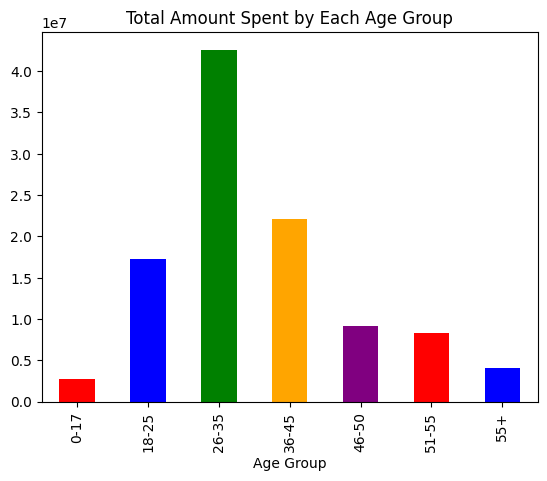

In [ ]:
age_group_amount = diwali_df.groupby('Age Group')['Amount'].sum()
age_group_amount.plot(kind='bar',x='Amount',title='Total Amount Spent by Each Age Group',color=['red', 'blue', 'green', 'orange', 'purple'])

# **5. Plot the graph that depicts total number of orders from top 10 states**

In [ ]:
top_10_states = diwali_df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10)
fig = px.bar(diwali_df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10),
             x=top_10_states.index,
             y=diwali_df.groupby('State')['Orders'].sum().sort_values(ascending=False).head(10).values,
             title='Total Number of Orders from Top 10 States',color=top_10_states.index)

fig.show()

# **6. Total amt of top 10 states**

In [ ]:
diwali_df.groupby('State')['Amount'].sum().nlargest(10)
fig = px.bar(diwali_df.groupby('State')['Amount'].sum().nlargest(10), y=diwali_df.groupby('State')['Amount'].sum().nlargest(10),color=['red','yellow','green','orange','purple','blue','pink','dark green','black','sky blue'])
fig.show()

# **7. Plot me a graph that shows comparison between no of married and unmarried people**

In [ ]:
fig_marital_status = px.pie(diwali_df, names='Marital_Status', title='Comparison between Married and Unmarried People',color='Marital_Status')
fig_marital_status.show()

# **8. Plot me amt spent by each male and each female wrt to marital status**

In [ ]:
fig = px.histogram(diwali_df,x='Marital_Status',y='Amount',color = 'Marital_Status', title='Amount Spent by Each Gender and Marital Status')
fig.show()

# **9. Plot me the count of each occupation that is present in dataset**

In [ ]:
fig=px.histogram(diwali_df,x='Occupation',title='Count of Each Occupation',color='Occupation')
fig.show()

# **10. Plot the amt spent by each occupation in descending order**

In [ ]:

diwali_df_sorted = diwali_df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()
fig = px.histogram(diwali_df_sorted,
                   x='Occupation',
                   y='Amount',
                   title='Amount Spent by Each Occupation',
                   color='Occupation')
fig.show()

# **11. Plot a graph that provides statistics on the interest of customers wrt to product category**



In [ ]:
fig = px.histogram(diwali_df, x='Product_Category',title='Statistics on Interest of Customers in Product Category',color = 'Product_Category')
fig.show()

# **12. I would like to know the budget spent on each product category in descending order**

In [ ]:
diwali_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
fig = px.bar(diwali_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False),
             x=diwali_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).index,
             y=diwali_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).values,
             title='Amount spent by each occupations',color=diwali_df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).index)
fig.show()

# **13. Provide me statistical analysis of each product based upon the percentage of orders that has been completed**

,Orders
Product_Category,
Auto,0.878352
Beauty,3.877602
Books,0.874781
Clothing & Apparel,23.686935
Decor,0.839076
Electronics & Gadgets,18.659621
Food,21.851680
Footwear & Shoes,9.476202
Furniture,3.177777


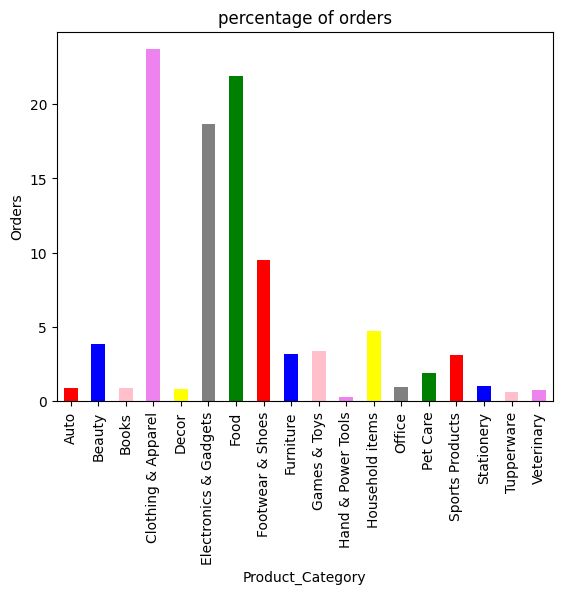

In [ ]:
import matplotlib.pyplot as plt
product=diwali_df.groupby('Product_Category')['Orders'].sum() / diwali_df['Orders'].sum() * 100
display(product)
product.plot.bar(color=['red','blue','pink','violet','yellow','grey','green'])
plt.xlabel('Product_Category')
plt.ylabel('Orders')
plt.title('percentage of orders')
plt.show()


# **14. Conclude that what you have understand form above dataset and give an detail explanation**



1. **Gender and Spending:** The data indicates a slightly higher number of female customers compared to males. However, the total amount spent by male customers is notably greater. This suggests a potential difference in purchasing power or preferences between genders.

2. **Age and Spending:** Younger age groups, particularly 26-35, demonstrate a higher spending capacity. This insight is valuable for targeted marketing and product development strategies.

3. **Marital Status:** Married individuals exhibit a greater inclination towards spending compared to unmarried individuals. This highlights the potential influence of family dynamics on purchasing decisions during the festive season.

4. **State-wise Sales:** Uttar Pradesh, Maharashtra, and Karnataka emerge as the top-performing states in terms of both order volume and total amount spent. This geographical information can guide inventory management and regional marketing efforts.

5. **Product Categories:** Food, clothing, and electronics stand out as the most popular product categories, attracting significant customer interest and generating substantial revenue. Understanding these preferences allows businesses to optimize product offerings and tailor promotional campaigns.

6. **Overall Business Insights:** This dataset provides valuable insights for businesses seeking to understand customer behavior, optimize marketing strategies, and enhance product development during the Diwali festive season. By leveraging these insights, companies can make informed decisions to maximize sales and customer satisfaction.




